<a href="https://colab.research.google.com/github/tejasreemachavarapu08/CODECRAFT_ML_02/blob/main/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install openpyxl

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [5]:
file_path = '/content/drive/MyDrive/Mall_Customers.xlsx'  # Change this path after uploading to Drive

# If using file upload instead
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_excel('Mall_Customers.xlsx')

df = pd.read_excel(file_path)
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Use features like 'Annual Income' and 'Spending Score' for clustering
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [7]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


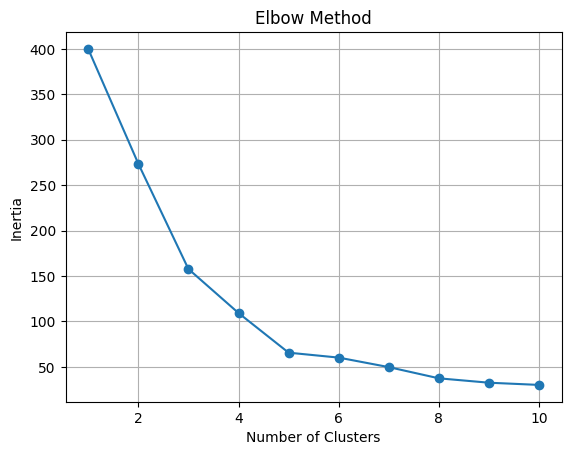

In [8]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid()
plt.show()


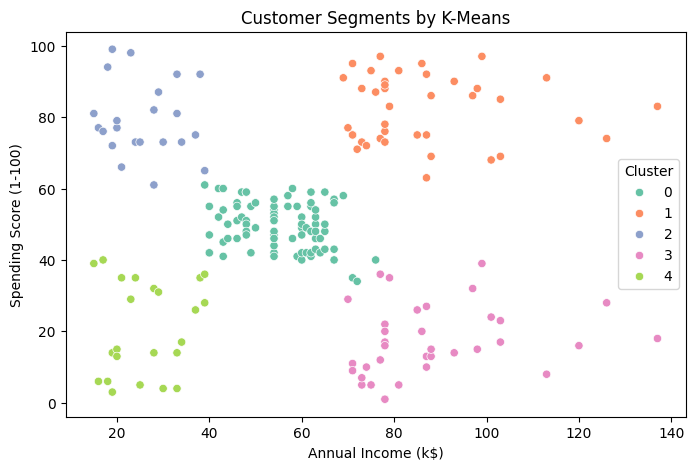

In [9]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualize clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
plt.title('Customer Segments by K-Means')
plt.show()
